# Linear Regression (practice)

**Author**: [Gilyoung Cheong](https://www.linkedin.com/in/gycheong/)

We use the [dataset about Walmart sales from Kaggle by mikhail1681](https://www.kaggle.com/datasets/mikhail1681/walmart-sales?select=Walmart_sales.csv) to implement linear regression models in practice. We will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/) for manipulating dataframes.
*   [`numpy`](https://numpy.org/) for various mathematical operations.
*   [`sklearn`](https://scikit-learn.org/stable/) for applying machine learning algorithms.
*   [`seaborn`](https://seaborn.pydata.org/) for data visualization.
*   [`matplotlib`](https://matplotlib.org/) for additional plotting.

In [212]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns # apparently named after Samuel Norman Seaborn: https://stackoverflow.com/questions/41499857/why-import-seaborn-as-sns
import matplotlib.pyplot as plt

In [13]:
url = "https://raw.githubusercontent.com/gycheong/machine_learning/main/Walmart_sales.csv"
df = pd.read_csv(url)
df.sample(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
2262,16,04-05-2012,426959.62,0,51.34,3.903,197.606353,6.169
1340,10,11-02-2011,2115408.31,1,51.51,3.381,127.859129,8.744
1385,10,23-12-2011,3487986.89,0,48.36,3.541,129.984548,7.874
2274,16,27-07-2012,539337.87,0,69.00,3.570,197.979214,6.061
3639,26,29-04-2011,873450.29,0,47.17,3.988,134.435733,7.818


In [9]:
df.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

From above, we see that our dataframe (i.e., the object df) has the following parameters. Descriptions are from [mikhail1681, the owner of the data](https://www.kaggle.com/datasets/mikhail1681/walmart-sales/data).

| Parameter | Description | Content type |
|---|----|---|
| Store | Store number | integer |
| Date | Sales week start date | integer |
| Weekly_Sales | Sales | float |
| Holiday_Flag | Mark on the presence or absence of a holiday | integer (0 or 1) |
| Temperature | Air temperature in the region | float |
| Fuel_Price | Fuel cost in the region (USD) | float | 
| CPI | Consumer price index | float |
| Unemployment | Unemployment rate | float |

## Setting the goal

We want to find a linear regression model whose input data are "Fuel_Price", "CPI", and "Unemployment" and output data is "Weekly_Sales".

In [20]:
print(df.isna().sum()) # Checking if there are any NaN values

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


## Scatter Plots

Let's make brief scatter plots to see how each input feature may be related to the output feature.

(0.0, 3999121.46)

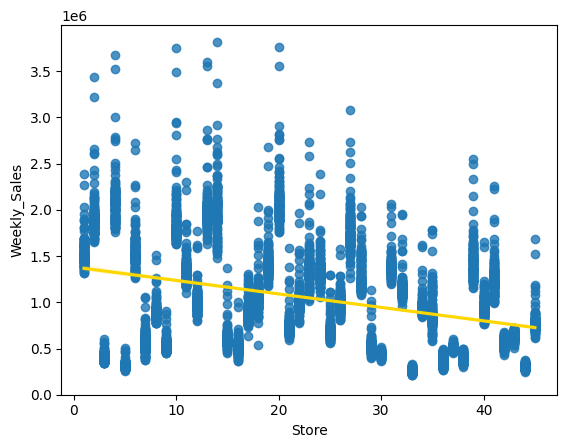

In [114]:
sns.regplot(x = "Store", y = "Weekly_Sales", data = df, line_kws = {"color" : "gold"})
plt.ylim(0,)

(0.0, 3999121.46)

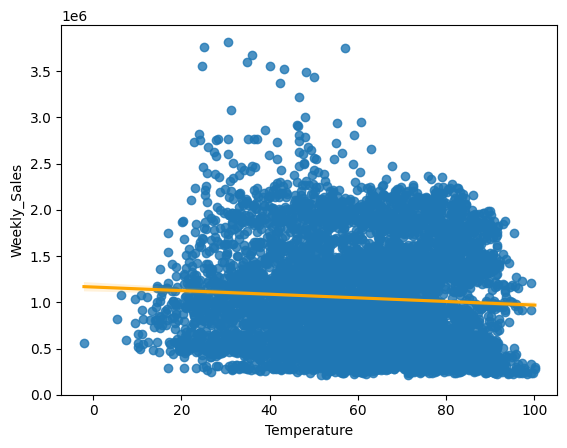

In [115]:
sns.regplot(x = "Temperature", y = "Weekly_Sales", data = df, line_kws = {"color" : "orange"})
plt.ylim(0,)

(0.0, 3999121.46)

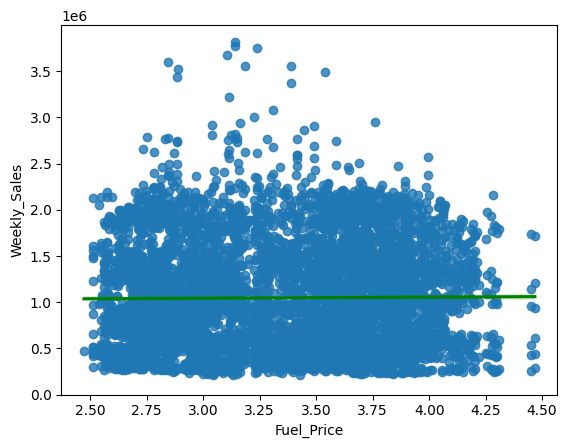

In [46]:
sns.regplot(x = "Fuel_Price", y = "Weekly_Sales", data = df, line_kws = {"color" : "green"})
plt.ylim(0,)

(0.0, 3999121.46)

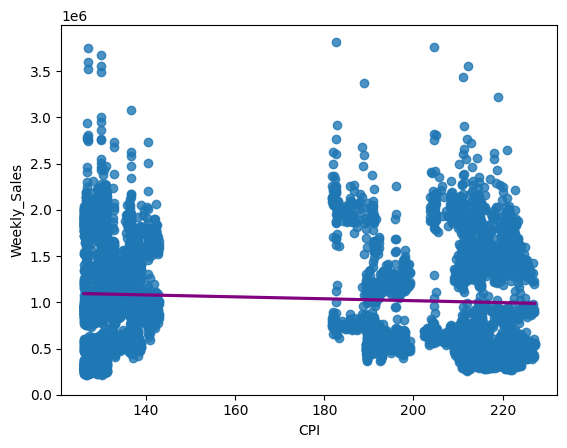

In [45]:
sns.regplot(x = "CPI", y = "Weekly_Sales", data = df, line_kws = {"color" : "purple"})
plt.ylim(0,)

(0.0, 3999121.46)

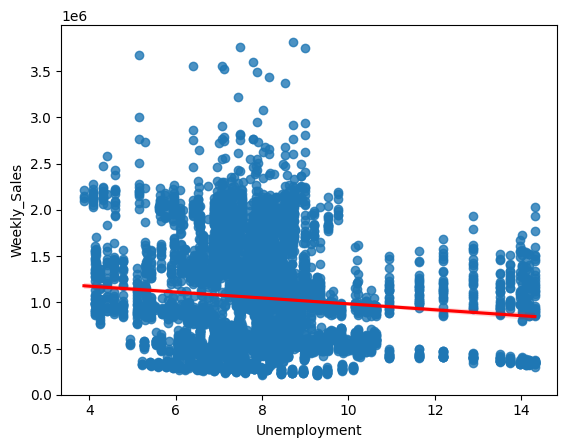

In [91]:
sns.regplot(x = "Unemployment", y = "Weekly_Sales", data = df, line_kws = {"color" : "red"})
plt.ylim(0,)


## Building Linear Regression Model

In [174]:
x_data = df[["Store", "Temperature", "Fuel_Price", "CPI", "Unemployment"]]
y_data = df[["Weekly_Sales"]]

In [257]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=1)

# We use 80% of our data for training and 20% of our data for testing

print("number of training samples:",x_train.shape[0])
print("number of test samples:", x_test.shape[0])

lr = LinearRegression()
lr.fit(x_train, y_train) # training the model (computed as in the theory discussion)


number of training samples: 5148
number of test samples: 1287


LinearRegression()

In [258]:
a = lr.intercept_
b = lr.coef_

# Our model is given by a + b[0] * "Fuel_Price" + b[1] * "CPI" + b[2] * "Unemployment"

print(lr.intercept_)
print(lr.coef_)

# From the scatter plot above, it makes sense that the unemployment rate affects the weekly sales the most

[2025597.32661688]
[[-15277.50438502   -838.89915397   4547.08788125  -2375.34469744
  -23525.040141  ]]


In [259]:
yhat = lr.predict(x_test) # given by plugging in our test value into the model we developed above
print("The value of R^2:", r2_score(yhat, y_test))
yhat

The value of R^2: -5.541793930440728


array([[1425494.34341173],
       [1166513.87035257],
       [1238691.65299038],
       ...,
       [ 687891.33311384],
       [ 739919.47249479],
       [ 878544.46990884]])

In [260]:
rr = Ridge(alpha = 100000)
rr.fit(x_train, y_train)
yhat_rr = rr.predict(x_test)
print("The value of R^2:", r2_score(yhat_rr, y_test))

The value of R^2: -7.402297381395627


In [267]:
poly = PolynomialFeatures(degree=10)
x_train_pr = poly.fit_transform(x_train)
y_train_pr = poly.fit_transform(y_train)

pr = LinearRegression()

pr.fit(x_train_pr, y_train_pr)

x_test_pr = poly.fit_transform(x_test)
y_test_pr = poly.fit_transform(y_test)

yhat_pr = pr.predict(x_test_pr)

print("The value of R^2:", r2_score(y_test_pr, yhat_pr))


The value of R^2: -0.6055556802967273
